In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker

import mpl_toolkits
import cartopy
import matplotlib.cm as cm

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [2]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/B1850C5CN_CA_REGION/'

In [7]:
file = 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-22001231_CA_REGION.nc'

In [8]:
d_oct = 31
d_nov = 30
d_dec = 31
d_jan = 31
d_feb = 28
d_mar = 31
days_per_season = d_oct+d_nov+d_dec+d_jan+d_feb+d_mar

In [9]:
i = 0

#ncfile = netCDF4.Dataset(working_dir + file_list[i])
ncfile = netCDF4.Dataset(working_dir + file)
PRECT_lat = ncfile.variables['lat'][:]
PRECT_lon = ncfile.variables['lon'][:]
PRECT_time_var = ncfile.variables['time']

PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
time_indices_NDJFM = numpy.array([t.month in [11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)
PRECT_time_dates_NDJFM = PRECT_time_dates[time_indices_NDJFM]

#LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
#LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

#PRECT_ONDJFM_CA = ncfile.variables['PRECT'][time_indices_ONDJFM,(LA_lat_idx-2):(LA_lat_idx+2), (LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000
PRECT_NDJFM_CA = ncfile.variables['PRECT'][time_indices_NDJFM,:,:]*86400.*1000

In [10]:
mean_pr = numpy.mean(PRECT_NDJFM_CA, axis=0)

In [11]:
SKIP_LONS = []#[120.,240.]
def format_every_other(lon):
    if lon in SKIP_LONS:
        return ''
    else:
        return '%3d' % lon + '\N{DEGREE SIGN}E' #r'${%3d\/^{\circ}\/E}$'%lon

In [12]:
# make color map
minval=0. # 
maxval=0.85 #
n=256
full_cmap = mp.get_cmap('gist_earth_r')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [13]:
def geo_idx(dd, dd_array):
    geo_idx = (numpy.abs(dd_array - dd)).argmin()
    return geo_idx

In [14]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 360 - LA_lon

#Oroville_dam_lat = 39.5380
#Oroville_dam_lon = 121.4831 # deg west
#Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

ncal_lat = 42.
ncal_lon = 236.

scal_lat = LA_lat #33.
scal_lon = LA_lon #244

ccal_lat = SF_lat #37.
ccal_lon = SF_lon #240.

In [15]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

# 3x3 longitude boxes

In [16]:
ncal_lat_idx = geo_idx(ncal_lat, PRECT_lat)
ncal_lon_idx = geo_idx(ncal_lon, PRECT_lon)

ccal_lat_idx = geo_idx(ccal_lat, PRECT_lat)
ccal_lon_idx = geo_idx(ccal_lon, PRECT_lon)

scal_lat_idx = geo_idx(scal_lat, PRECT_lat)
scal_lon_idx = geo_idx(scal_lon, PRECT_lon)

ncal_lats = PRECT_lat[ncal_lat_idx-1:ncal_lat_idx+2]
ccal_lats = PRECT_lat[ccal_lat_idx-1:ccal_lat_idx+2]
scal_lats = PRECT_lat[scal_lat_idx-1:scal_lat_idx+2]

ncal_lons = PRECT_lon[ncal_lon_idx-1:ncal_lon_idx+2]
ccal_lons = PRECT_lon[ccal_lon_idx-1:ccal_lon_idx+2]
scal_lons = PRECT_lon[scal_lon_idx-1:scal_lon_idx+2]

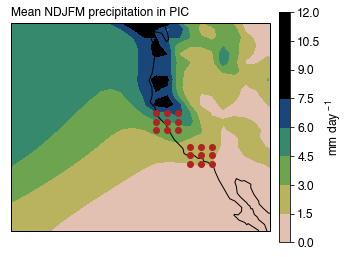

In [64]:
fontsize = 12

fig,ax = mp.subplots(1,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(4,3.5)

ax.set_extent([PRECT_lon.min(), PRECT_lon.max()-1, PRECT_lat.min(), PRECT_lat.max()-1])
ax.coastlines()

pr_map = ax.contourf(PRECT_lon,PRECT_lat,mean_pr,vmin=0,vmax=8,cmap='gist_earth_r')

fig.tight_layout()

ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.03,ax_pos.y0,0.04,ax_pos.height])
cbar = mp.colorbar(pr_map, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

ax.text(s='Mean NDJFM precipitation in PIC',x=0,y=1.02,ha='left',va='bottom',fontsize=fontsize,transform=ax.transAxes)

lon_mesh,lat_mesh = numpy.meshgrid(PRECT_lon,PRECT_lat)
ax.scatter(lon_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2],\
           lat_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2],\
           zorder=2,\
           c='firebrick')

ax.scatter(lon_mesh[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2],\
           lat_mesh[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2],\
           zorder=2,\
           c='firebrick')

mp.savefig('precip_with_3x3_points.png',dpi=600,bbox_inches='tight',transparent=True)

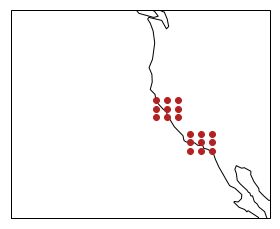

In [66]:
fontsize = 12

fig,ax = mp.subplots(1,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(4,3.5)

ax.set_extent([PRECT_lon.min(), PRECT_lon.max()-1, PRECT_lat.min(), PRECT_lat.max()-1])
ax.coastlines()

#pr_map = ax.contourf(PRECT_lon,PRECT_lat,mean_pr,vmin=0,vmax=8,cmap='gist_earth_r')

fig.tight_layout()

# ax_pos = ax.get_position()
# cbar_ax = fig.add_axes([ax_pos.x1+0.03,ax_pos.y0,0.04,ax_pos.height])
# cbar = mp.colorbar(pr_map, cax=cbar_ax)
# cbar_ax.tick_params(labelsize=fontsize)
# cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

#ax.text(s='Mean NDJFM precipitation in PIC',x=0,y=1.02,ha='left',va='bottom',fontsize=fontsize,transform=ax.transAxes)

lon_mesh,lat_mesh = numpy.meshgrid(PRECT_lon,PRECT_lat)
ax.scatter(lon_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2],\
           lat_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2],\
           zorder=2,\
           c='firebrick')

ax.scatter(lon_mesh[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2],\
           lat_mesh[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2],\
           zorder=2,\
           c='firebrick')

ax.background_patch.set_visible(False)

mp.savefig('precip_with_3x3_points_blank.png',dpi=600,bbox_inches='tight',transparent=True)

In [56]:
lat_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2]
lon_mesh[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2]

array([[ 240.  ,  241.25,  242.5 ],
       [ 240.  ,  241.25,  242.5 ],
       [ 240.  ,  241.25,  242.5 ]])

In [49]:
lon_mesh.shape

(26, 25)

In [22]:
PRECT_NDJFM_CA.shape

(271648, 26, 25)

# Create coastal latitude/longitude arrays

In [15]:
coastal_latlon_indices = numpy.zeros((PRECT_lat.size, 2), dtype=numpy.int)
coastal_latlon_indices[:,1] = ccal_lon_idx + numpy.arange(-15,11,dtype=numpy.int)[::-1]
#coastal_latlon_indices[:,0] = numpy.arange(PRECT_lat.size, dtype=numpy.int)
coastal_latlon_indices[:,0] = numpy.arange(PRECT_lat.size, dtype=numpy.int)
coastal_latlon_indices = coastal_latlon_indices[7:18,:]

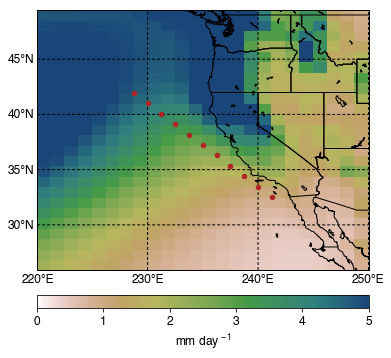

In [16]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)

#ax.text(s='PIC precipitation',x=0.0,y=1.03,ha='left',va='bottom',transform=ax.transAxes,fontsize=fontsize)

center_lat = 0.5*(PRECT_lat.min()+PRECT_lat.max())
center_lon = 0.5*(PRECT_lon.min()+PRECT_lon.max())

#map = basemap.Basemap(projection='cea',llcrnrlat=lats.min(),urcrnrlat=lats.max(),llcrnrlon=lons.min(),urcrnrlon=lons.max(),resolution='m',area_thresh=10000000)   
#map = basemap.Basemap(width=3.5e6,height=3e6,resolution='l',projection='eqdc',lat_1=PRECT_lat.min(),lat_2=PRECT_lat.max(),lat_0=center_lat,lon_0=center_lon)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')

map.drawcoastlines(linewidth=1, color='0', zorder=3) # you can specify white as 1.0, black as 0.0, and any gray as fraction
map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1, color='0', zorder=3)
map.drawcountries(linewidth=1, color='0', zorder=3)

map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize)
map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize)
map.drawmapboundary(fill_color='0.5')

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

#pr_map = map.contourf(xi, yi, mean_pr, levels=contour_levels, extend='max', cmap=cmap_partial, zorder=2)
pr_map = map.pcolormesh(xi, yi, mean_pr, cmap=cmap_partial, zorder=2, vmin=0, vmax=5, ax=ax, latlon=True)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.35) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')
#cbar = map.colorbar(pr_map, location='bottom', pad=0.3)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.scatter(PRECT_lon[coastal_latlon_indices[:,1]], PRECT_lat[coastal_latlon_indices[:,0]], marker='o', c='firebrick', s=20, label='northern Cal.', zorder=3)

fig.tight_layout()

#fig.savefig('pic_plot_mean_ceq.pdf', bbox_inches='tight')

In [17]:
coastal_latlon_indices = numpy.zeros((PRECT_lat.size, 2), dtype=numpy.int)
coastal_latlon_indices[:,1] = ccal_lon_idx + numpy.arange(-15,11,dtype=numpy.int)[::-1]
coastal_latlon_indices[:,0] = numpy.arange(PRECT_lat.size, dtype=numpy.int)
coastal_latlon_indices = coastal_latlon_indices[7:18,:]

# 11 total
coastal_latlon_indices[10,1] += 5
coastal_latlon_indices[9,1] += 4
coastal_latlon_indices[8,1] += 3
coastal_latlon_indices[7,1] += 3
coastal_latlon_indices[6,1] += 2
coastal_latlon_indices[5,1] += 2
coastal_latlon_indices[4,1] += 1
coastal_latlon_indices[3,1] += 1
coastal_latlon_indices[2,1] += 1
coastal_latlon_indices[1,1] += 1
coastal_latlon_indices[0,1] += 1

left = numpy.zeros(11, dtype=numpy.int)
right_plus = numpy.ones(11, dtype=numpy.int)
right_minus = numpy.ones(11, dtype=numpy.int) * -1

coastal_latlon_indices_3x = numpy.zeros((coastal_latlon_indices.shape[0]*3, 2), dtype=numpy.int)
coastal_latlon_indices_3x[0:11,:] = coastal_latlon_indices
coastal_latlon_indices_3x[11:22,:] = coastal_latlon_indices + numpy.dstack((left, right_minus)).squeeze()
coastal_latlon_indices_3x[22:33,:] = coastal_latlon_indices + numpy.dstack((left, right_plus)).squeeze()

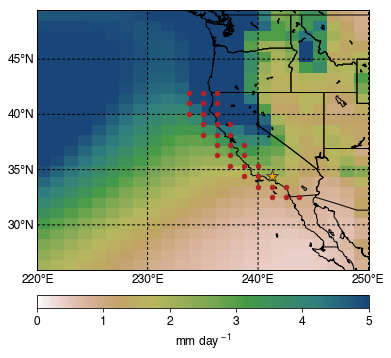

In [18]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)

#ax.text(s='PIC precipitation',x=0.0,y=1.03,ha='left',va='bottom',transform=ax.transAxes,fontsize=fontsize)

center_lat = 0.5*(PRECT_lat.min()+PRECT_lat.max())
center_lon = 0.5*(PRECT_lon.min()+PRECT_lon.max())

#map = basemap.Basemap(projection='cea',llcrnrlat=lats.min(),urcrnrlat=lats.max(),llcrnrlon=lons.min(),urcrnrlon=lons.max(),resolution='m',area_thresh=10000000)   
#map = basemap.Basemap(width=3.5e6,height=3e6,resolution='l',projection='eqdc',lat_1=PRECT_lat.min(),lat_2=PRECT_lat.max(),lat_0=center_lat,lon_0=center_lon)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')

map.drawcoastlines(linewidth=1, color='0', zorder=3) # you can specify white as 1.0, black as 0.0, and any gray as fraction
map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1, color='0', zorder=3)
map.drawcountries(linewidth=1, color='0', zorder=3)

map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize)
map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize)
map.drawmapboundary(fill_color='0.5')

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

#pr_map = map.contourf(xi, yi, mean_pr, levels=contour_levels, extend='max', cmap=cmap_partial, zorder=2)
pr_map = map.pcolormesh(xi, yi, mean_pr, cmap=cmap_partial, zorder=2, vmin=0, vmax=5, ax=ax, latlon=True)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.35) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')
#cbar = map.colorbar(pr_map, location='bottom', pad=0.3)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.scatter(PRECT_lon[coastal_latlon_indices_3x[:,1]], PRECT_lat[coastal_latlon_indices_3x[:,0]], marker='o', c='firebrick', s=20, label='northern Cal.', zorder=3)
ax.scatter(PRECT_lon[17], PRECT_lat[9], marker='*', facecolor='orange', edgecolor='0.25', s=150, zorder=4)

fig.tight_layout()

fig.savefig('pic_coastal_points.pdf', bbox_inches='tight')

In [19]:
print(geo_idx(LA_lat, PRECT_lat))
print(geo_idx(LA_lon, PRECT_lon))

latsort = numpy.argsort(coastal_latlon_indices_3x[:,0])
coastal_latlon_indices_3x = coastal_latlon_indices_3x[latsort,:]
print(coastal_latlon_indices_3x)

9
17
[[ 7 18]
 [ 7 19]
 [ 7 17]
 [ 8 17]
 [ 8 18]
 [ 8 16]
 [ 9 16]
 [ 9 17]
 [ 9 15]
 [10 15]
 [10 16]
 [10 14]
 [11 14]
 [11 15]
 [11 13]
 [12 15]
 [12 13]
 [12 14]
 [13 12]
 [13 13]
 [13 14]
 [14 12]
 [14 13]
 [14 14]
 [15 11]
 [15 12]
 [15 13]
 [16 11]
 [16 12]
 [16 13]
 [17 11]
 [17 12]
 [17 13]]


In [20]:
#numpy.save('npy_files/coastal_latlon_array_indices.npy', coastal_latlon_indices)
numpy.save('npy_files/coastal_latlon_array_indices_3x.npy', coastal_latlon_indices_3x)

In [21]:
ccal_lons = xi[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2].flatten()
ccal_lats = yi[ccal_lat_idx-1:ccal_lat_idx+2,ccal_lon_idx-1:ccal_lon_idx+2].flatten()

scal_lons = xi[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2].flatten()
scal_lats = yi[scal_lat_idx-1:scal_lat_idx+2,scal_lon_idx-1:scal_lon_idx+2].flatten()

ncal_lons = xi[ncal_lat_idx-1:ncal_lat_idx+2,ncal_lon_idx-1:ncal_lon_idx+2].flatten()
ncal_lats = yi[ncal_lat_idx-1:ncal_lat_idx+2,ncal_lon_idx-1:ncal_lon_idx+2].flatten()

In [22]:
ccal_latlon_array = numpy.vstack((ccal_lats, ccal_lons)).T
ncal_latlon_array = numpy.vstack((ncal_lats, ncal_lons)).T
scal_latlon_array = numpy.vstack((scal_lats, scal_lons)).T

numpy.save('npy_files/ccal_latlon_array.npy', ccal_latlon_array)
numpy.save('npy_files/ncal_latlon_array.npy', ncal_latlon_array)
numpy.save('npy_files/scal_latlon_array.npy', scal_latlon_array)

In [23]:
numpy.load('npy_files/ccal_latlon_array.npy')

array([[  37.22513089,  236.25      ],
       [  37.22513089,  237.5       ],
       [  37.22513089,  238.75      ],
       [  38.16753927,  236.25      ],
       [  38.16753927,  237.5       ],
       [  38.16753927,  238.75      ],
       [  39.10994764,  236.25      ],
       [  39.10994764,  237.5       ],
       [  39.10994764,  238.75      ]])

In [24]:
ccal_latlon_indices_array = numpy.zeros((ccal_latlon_array.shape), dtype=numpy.int)
ncal_latlon_indices_array = numpy.zeros((ncal_latlon_array.shape), dtype=numpy.int)
scal_latlon_indices_array = numpy.zeros((scal_latlon_array.shape), dtype=numpy.int)

for i in range(ccal_latlon_array.shape[0]):
    ccal_latlon_indices_array[i,:] = numpy.where(ccal_latlon_array[i,0]==PRECT_lat)[0], numpy.where(ccal_latlon_array[i,1]==PRECT_lon)[0]
for i in range(ncal_latlon_array.shape[0]):
    ncal_latlon_indices_array[i,:] = numpy.where(ncal_latlon_array[i,0]==PRECT_lat)[0], numpy.where(ncal_latlon_array[i,1]==PRECT_lon)[0]
for i in range(scal_latlon_array.shape[0]):
    scal_latlon_indices_array[i,:] = numpy.where(scal_latlon_array[i,0]==PRECT_lat)[0], numpy.where(scal_latlon_array[i,1]==PRECT_lon)[0]
    
numpy.save('npy_files/ccal_latlon_indices_array.npy', ccal_latlon_indices_array)
numpy.save('npy_files/ncal_latlon_indices_array.npy', ncal_latlon_indices_array)
numpy.save('npy_files/scal_latlon_indices_array.npy', scal_latlon_indices_array)
    